In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df_covid19 = pd.read_csv("data/cleaned_data/covid19_timeseries.csv")

In [13]:
df_covid19.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,uuid
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,2
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,3
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,4
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,5


In [6]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  49068 non-null  object 
 1   Lat             49068 non-null  float64
 2   Long            49068 non-null  float64
 3   Date            49068 non-null  object 
 4   Confirmed       49068 non-null  int64  
 5   Deaths          49068 non-null  int64  
 6   Recovered       49068 non-null  int64  
 7   Active          49068 non-null  int64  
 8   WHO Region      49068 non-null  object 
 9   uuid            49068 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


In [9]:
df_covid19.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active,uuid
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068.000000
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,24534.500000
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,14164.855841
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,1.000000
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,12267.750000
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,24534.500000
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,36801.250000
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,49068.000000


In [18]:
df_covid19.loc[df_covid19["Country/Region"] == "Australia" ,:].tail()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,uuid
48818,Australia,-27.4698,153.0251,2020-07-27,1076,6,1063,7,Western Pacific,48819
48819,Australia,-34.9285,138.6007,2020-07-27,447,4,441,2,Western Pacific,48820
48820,Australia,-42.8821,147.3272,2020-07-27,229,13,215,1,Western Pacific,48821
48821,Australia,-37.8136,144.9631,2020-07-27,9049,83,3817,5149,Western Pacific,48822
48822,Australia,-31.9505,115.8605,2020-07-27,659,9,647,3,Western Pacific,48823


In [103]:
sb.set_theme()

## Top 5 confirmed Countries

In [45]:
df_each_state_country_confirmed = pd.DataFrame(df_covid19.groupby(["Country/Region", "Lat", "Long"])\
                                               ["Confirmed"].max())

In [46]:
df_each_state_country_confirmed.head()

,,,Confirmed
Country/Region,Lat,Long,
Afghanistan,33.93911,67.709953,36263
Albania,41.15330,20.168300,4880
Algeria,28.03390,1.659600,27973
Andorra,42.50630,1.521800,907
Angola,-11.20270,17.873900,950


In [48]:
df_each_country_confirmed = df_each_state_country_confirmed.groupby("Country/Region")["Confirmed"].sum()

In [49]:
df_each_country_confirmed.head()

Country/Region
Afghanistan    36263
Albania         4880
Algeria        27973
Andorra          907
Angola           950
Name: Confirmed, dtype: int64

In [55]:
top_5_country_confirmed = df_each_country_confirmed.sort_values(ascending=False)[:5]

In [56]:
top_5_country_confirmed

Country/Region
US              4290259
Brazil          2442375
India           1480073
Russia           816680
South Africa     452529
Name: Confirmed, dtype: int64

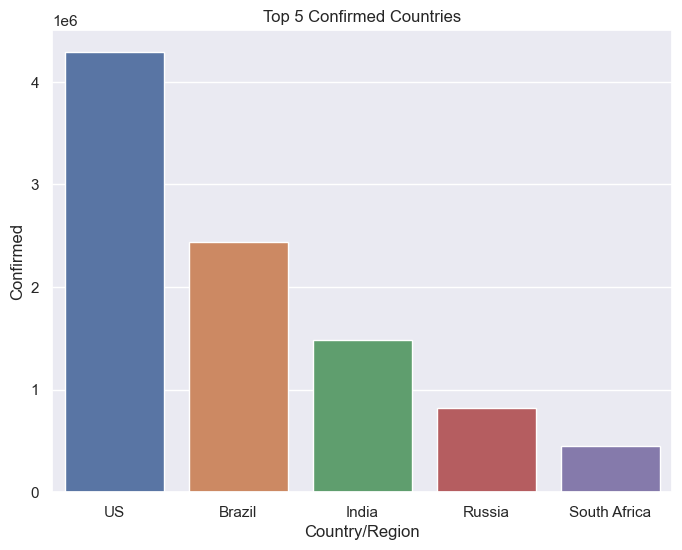

In [104]:
plt.figure(figsize=(8,6))
sb.barplot(data=pd.DataFrame(top_5_country_confirmed), x=pd.DataFrame(top_5_country_confirmed).index, y="Confirmed")
plt.title("Top 5 Confirmed Countries");

In [92]:
df_covid19_vietnam = df_covid19[df_covid19["Country/Region"] == "Vietnam"]

In [93]:
df_covid19_vietnam.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,uuid
226,Vietnam,14.058324,108.277199,2020-01-22,0,0,0,0,Western Pacific,227
487,Vietnam,14.058324,108.277199,2020-01-23,2,0,0,2,Western Pacific,488
748,Vietnam,14.058324,108.277199,2020-01-24,2,0,0,2,Western Pacific,749
1009,Vietnam,14.058324,108.277199,2020-01-25,2,0,0,2,Western Pacific,1010
1270,Vietnam,14.058324,108.277199,2020-01-26,2,0,0,2,Western Pacific,1271


In [95]:
df_covid19_vietnam["month"] = df_covid19_vietnam["Date"].apply(lambda x: x[5:7])

/var/folders/_x/qxxyjlqn599916gm7p6_k2v40000gn/T/ipykernel_30776/945084674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid19_vietnam["month"] = df_covid19_vietnam["Date"].apply(lambda x: x[5:7])


In [97]:
df_covid19_vietnam

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,uuid,month
226,Vietnam,14.058324,108.277199,2020-01-22,0,0,0,0,Western Pacific,227,01
487,Vietnam,14.058324,108.277199,2020-01-23,2,0,0,2,Western Pacific,488,01
748,Vietnam,14.058324,108.277199,2020-01-24,2,0,0,2,Western Pacific,749,01
1009,Vietnam,14.058324,108.277199,2020-01-25,2,0,0,2,Western Pacific,1010,01
1270,Vietnam,14.058324,108.277199,2020-01-26,2,0,0,2,Western Pacific,1271,01
...,...,...,...,...,...,...,...,...,...,...,...
47989,Vietnam,14.058324,108.277199,2020-07-23,412,0,365,47,Western Pacific,47990,07
48250,Vietnam,14.058324,108.277199,2020-07-24,415,0,365,50,Western Pacific,48251,07
48511,Vietnam,14.058324,108.277199,2020-07-25,417,0,365,52,Western Pacific,48512,07
48772,Vietnam,14.058324,108.277199,2020-07-26,420,0,365,55,Western Pacific,48773,07


In [106]:
month_confirmed = df_covid19_vietnam.groupby("month")["Confirmed"].max()
month_deaths = df_covid19_vietnam.groupby("month")["Deaths"].max()
month_recovered = df_covid19_vietnam.groupby("month")["Recovered"].max()

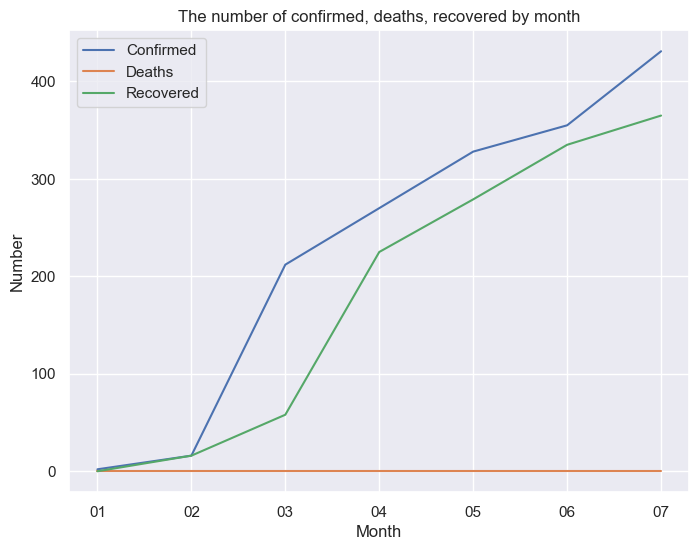

In [112]:
plt.figure(figsize=(8,6))
plt.plot(month_confirmed, label="Confirmed")
plt.plot(month_deaths, label="Deaths")
plt.plot(month_recovered, label="Recovered")
plt.title("The number of confirmed, deaths, recovered by month");
plt.xlabel("Month")
plt.ylabel("Number")
plt.legend()
plt.show()